In [32]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

data, meta = arff.loadarff('column_2C_weka.arff')

df = pd.DataFrame(data)

print(df.columns)

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


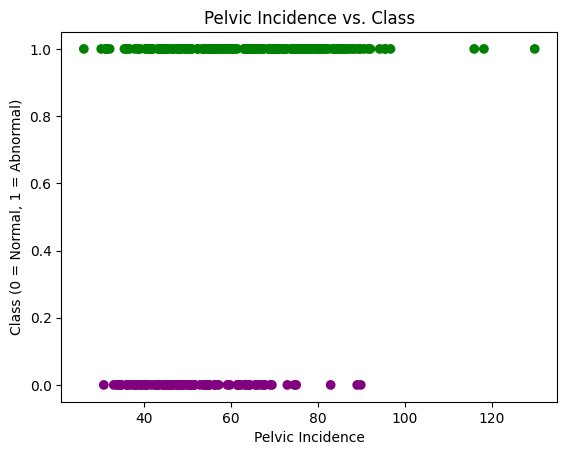

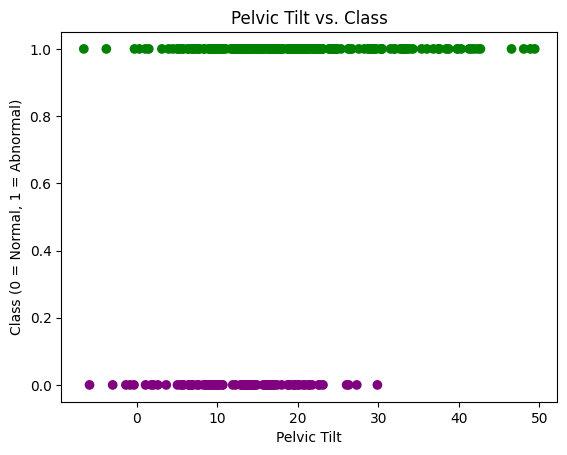

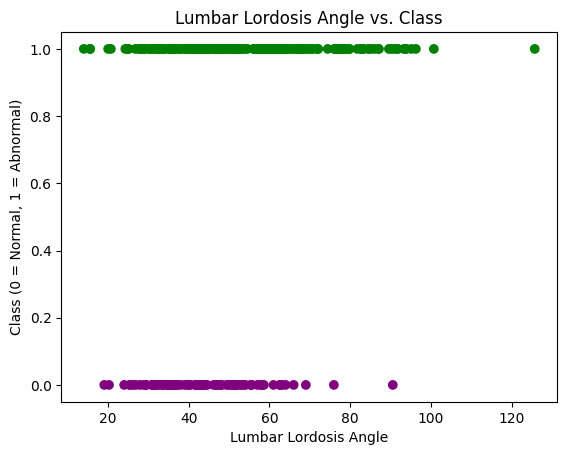

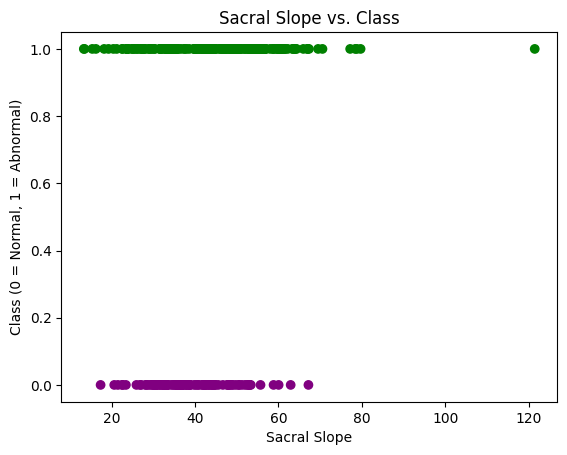

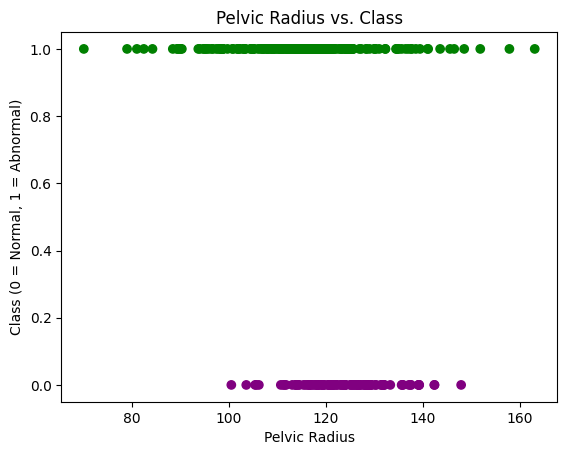

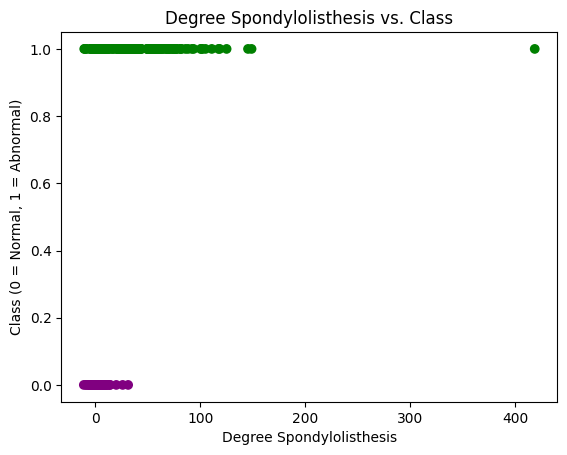

In [33]:
df['class'] = df['class'].astype(str)
df['class_numeric'] = df['class'].map({'Normal': 0, 'Abnormal': 1})

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
          'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

color_map = {'Normal': 'purple', 'Abnormal': 'green'}

for col in features:
    plt.scatter(df[col], df['class_numeric'], c=df['class'].map(color_map))
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Class (0 = Normal, 1 = Abnormal)')
    plt.title(f'{col.replace("_", " ").title()} vs. Class')
    plt.show()


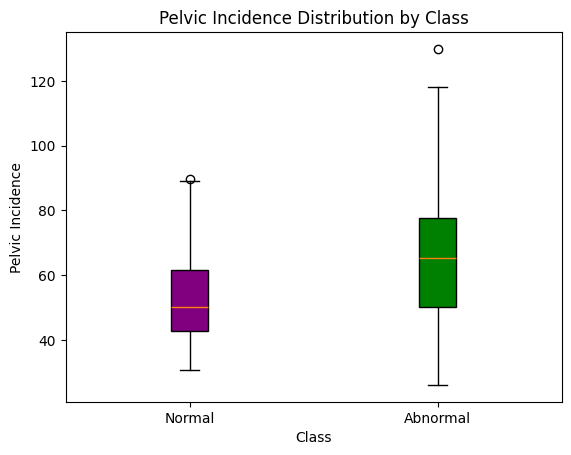

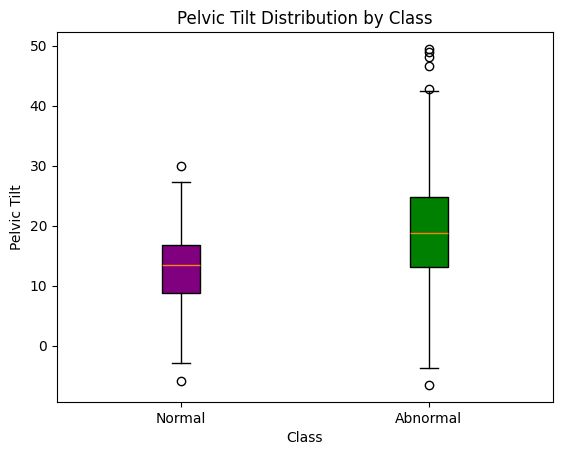

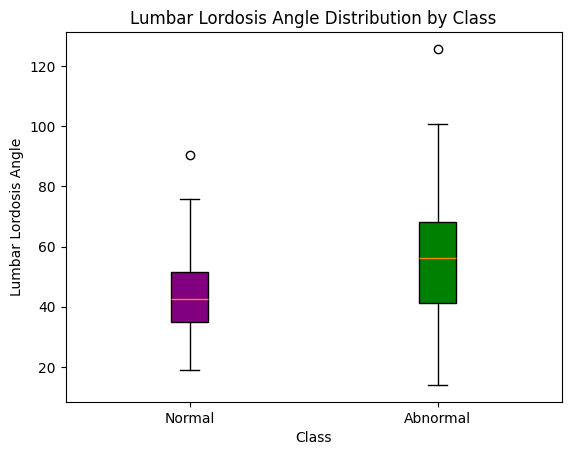

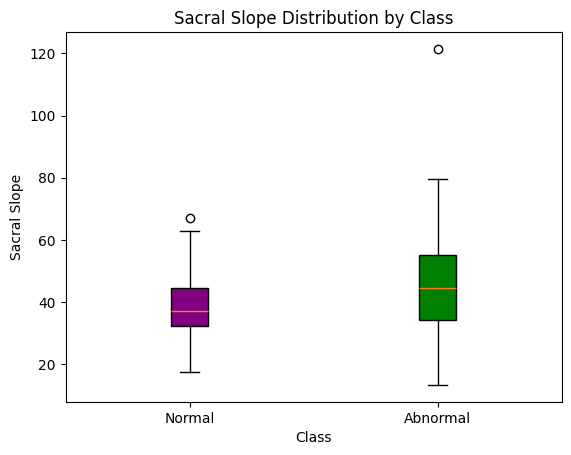

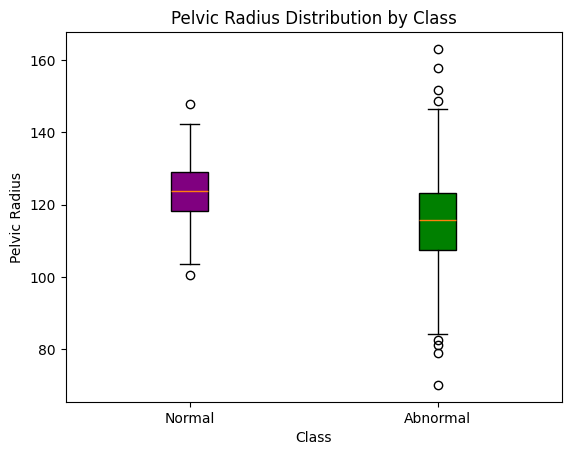

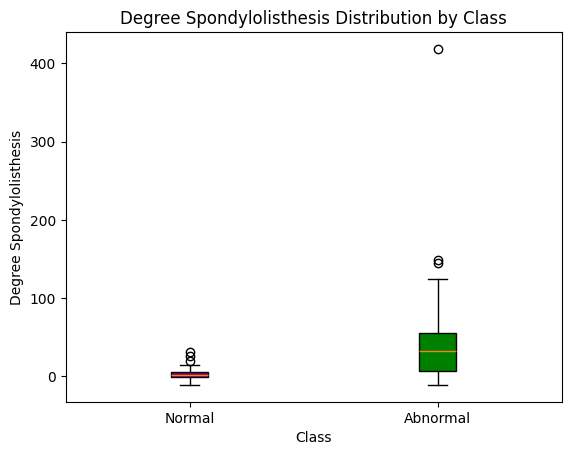

In [34]:
colors = ['purple', 'green']

for col in features:
    data_to_plot = [df[df['class_numeric'] == 0][col], df[df['class_numeric'] == 1][col]]

    box = plt.boxplot(data_to_plot, tick_labels=['Normal', 'Abnormal'], patch_artist=True)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xlabel('Class')
    plt.ylabel(col.replace('_', ' ').title())
    plt.title(f'{col.replace("_", " ").title()} Distribution by Class')
    plt.show()


In [46]:
#separates dataset into the two classes
class0 = df[df['class_numeric'] == 0]
class1 = df[df['class_numeric'] == 1]

#specifies the number of samples to use for training
train_size_0 = min(70, len(class0))
train_size_1 = min(140, len(class1))

#creates the training set by using the sample size selected from using len
train_set = pd.concat([class0.iloc[:train_size_0], class1.iloc[:train_size_1]])
#removes the training set samples to create the test set
test_set = df.drop(train_set.index)

print("\nTraining Data Sample:")
print(train_set.head())

print("\nTest Data Sample:")
print(test_set.head())



Training Data Sample:
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210         38.505273    16.964297              35.112814     21.540976   
211         54.920858    18.968430              51.601455     35.952428   
212         44.362490     8.945435              46.902096     35.417055   
213         48.318931    17.452121              48.000000     30.866809   
214         45.701789    10.659859              42.577846     35.041929   

     pelvic_radius  degree_spondylolisthesis   class  class_numeric  
210     127.632875                  7.986683  Normal              0  
211     125.846646                  2.001642  Normal              0  
212     129.220682                  4.994195  Normal              0  
213     128.980308                 -0.910941  Normal              0  
214     130.178314                 -3.388910  Normal              0  

Test Data Sample:
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
140         

In [36]:
from sklearn.neighbors import KNeighborsClassifier

#removes features and labels from training and test sets
xtrain = train_set[features]
ytrain = train_set['class_numeric']
xtest = test_set[features]
ytest = test_set['class_numeric']

k_value = 5
distance_metric = 'euclidean'

#train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=k_value, metric=distance_metric)
#uses the training data to train the model
knn_model.fit(xtrain, ytrain)

#stores the predictions
ypred = knn_model.predict(xtest)

k=208: Train Error = 0.333, Test Error = 0.300
k=205: Train Error = 0.333, Test Error = 0.300
k=202: Train Error = 0.333, Test Error = 0.300
k=199: Train Error = 0.333, Test Error = 0.300
k=196: Train Error = 0.333, Test Error = 0.300
k=193: Train Error = 0.333, Test Error = 0.300
k=190: Train Error = 0.333, Test Error = 0.300
k=187: Train Error = 0.333, Test Error = 0.300
k=184: Train Error = 0.333, Test Error = 0.300
k=181: Train Error = 0.333, Test Error = 0.300
k=178: Train Error = 0.333, Test Error = 0.300
k=175: Train Error = 0.333, Test Error = 0.300
k=172: Train Error = 0.333, Test Error = 0.300
k=169: Train Error = 0.333, Test Error = 0.300
k=166: Train Error = 0.333, Test Error = 0.300
k=163: Train Error = 0.333, Test Error = 0.300
k=160: Train Error = 0.333, Test Error = 0.300
k=157: Train Error = 0.333, Test Error = 0.300
k=154: Train Error = 0.333, Test Error = 0.300
k=151: Train Error = 0.333, Test Error = 0.300
k=148: Train Error = 0.333, Test Error = 0.300
k=145: Train 

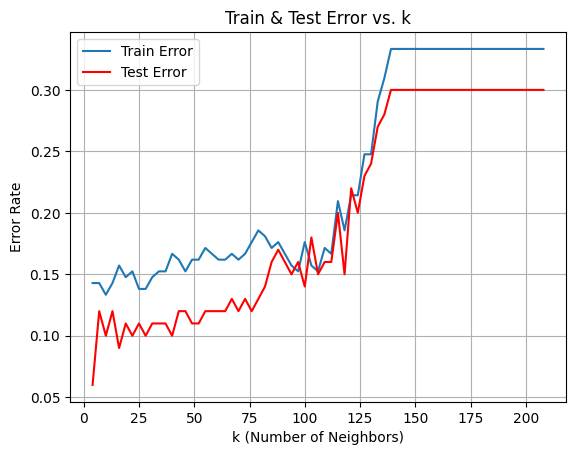

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

k_values = range(208, 2, -3)

train_errors = []
test_errors = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
    model.fit(xtrain, ytrain)
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    #computes and stores the error rates
    train_errors.append(1 - accuracy_score(ytrain, train_pred))
    test_errors.append(1 - accuracy_score(ytest, test_pred))

#prints each training and test error to compare k values
for k, tr_err, te_err in zip(k_values, train_errors, test_errors):
    print(f"k={k}: Train Error = {tr_err:.3f}, Test Error = {te_err:.3f}")

#selected k value with the lowest test error
best_k = 4
#trains a new KNN classifier using the selected k value (best k)
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=distance_metric)
knn_best.fit(xtrain, ytrain)

#predicts using new model
ypred_best = knn_best.predict(xtest)

#computes confusion matrix
conf_matrix = confusion_matrix(ytest, ypred_best)

true_positive = conf_matrix[1, 1] #correctly predicted positive cases
true_negative = conf_matrix[0, 0] #correctly predicted negative cases
false_positive = conf_matrix[0, 1] #incorrectly predicted positive cases
false_negative = conf_matrix[1, 0] #incorrectly predicted negative cases

#shorthand variables for easier computation
tp = true_positive
tn = true_negative
fp = false_positive
fn = false_negative

truePositive_rate = tp / (tp + fn)
trueNegative_rate = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * truePositive_rate) / (precision + truePositive_rate)

print("\nConfusion Matrix:")
print(confusion_matrix(ytest, ypred_best))

print("\nClassification Report:")
print(classification_report(ytest, ypred_best))

print(f"\nTrue Positive Rate: {truePositive_rate:}")
print(f"True Negative Rate: {trueNegative_rate:}")
print(f"Precision: {precision:}")
print(f"F1-score: {f1_score:}")

#plot training error curve
plt.plot(k_values, train_errors, label="Train Error")
#plot test error curve
plt.plot(k_values, test_errors, label="Test Error", color='red')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Error Rate")
plt.title("Train & Test Error vs. k")
plt.legend()
plt.grid(True)
plt.show()

N=10 | k=1, Test Error=0.22999999999999998
N=20 | k=6, Test Error=0.18999999999999995
N=30 | k=1, Test Error=0.18999999999999995
N=40 | k=11, Test Error=0.25
N=50 | k=11, Test Error=0.27
N=60 | k=16, Test Error=0.29000000000000004
N=70 | k=26, Test Error=0.28
N=80 | k=21, Test Error=0.28
N=90 | k=36, Test Error=0.28
N=100 | k=36, Test Error=0.28
N=110 | k=6, Test Error=0.22999999999999998
N=120 | k=6, Test Error=0.19999999999999996
N=130 | k=6, Test Error=0.19999999999999996
N=140 | k=16, Test Error=0.19999999999999996
N=150 | k=1, Test Error=0.19999999999999996
N=160 | k=6, Test Error=0.18000000000000005
N=170 | k=6, Test Error=0.16000000000000003
N=180 | k=1, Test Error=0.17000000000000004
N=190 | k=1, Test Error=0.17000000000000004
N=200 | k=16, Test Error=0.16000000000000003
N=210 | k=26, Test Error=0.15000000000000002


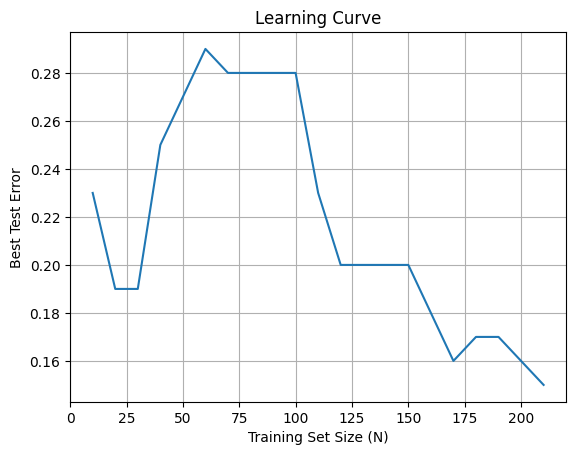

In [48]:
from sklearn.preprocessing import StandardScaler

training_sizes = list(range(10, 211, 10))

#store best test errors for each training size
bestTest_errors = []

#loops for different training set sizes
for N in training_sizes:
    N_class0 = N // 3
    N_class1 = N - N_class0
    #selects samples from each class
    class0_subset = train_set[train_set['class_numeric'] == 0].iloc[:N_class0]
    class1_subset = train_set[train_set['class_numeric'] == 1].iloc[:N_class1]
    #new training subset
    train_subset = pd.concat([class0_subset, class1_subset])
    xtrain_subset = train_subset[features]
    ytrain_subset = train_subset['class_numeric']

    #standardization
    scaler = StandardScaler()
    xtrain_scaled = scaler.fit_transform(xtrain_subset)
    xtest_scaled = scaler.transform(xtest)

    #defines a range of k values and ensures that k doesn't exceed number of training samples
    k_values = list(range(1, max(2, N - 3), 5))

    #initialize variables to track k* and minimum test error
    best_k = None
    minTest_error = float('inf')

    for k in k_values:
        #skips k values that are larger than the training subset size
        if k >= len(ytrain_subset):
            continue

        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        knn.fit(xtrain_scaled, ytrain_subset)

        y_pred = knn.predict(xtest_scaled)
        test_error = 1 - accuracy_score(ytest, y_pred)

        #update k* if this k produces a lower test error
        if test_error < minTest_error:
            minTest_error = test_error
            best_k = k

    #stores lowest test error for training size N
    bestTest_errors.append(minTest_error)

    print(f"N={N} | k={best_k}, Test Error={minTest_error:}")

#plots learning curve
plt.plot(training_sizes, bestTest_errors)
plt.xlabel("Training Set Size (N)")
plt.ylabel("Best Test Error")
plt.title("Learning Curve")
plt.grid(True)
plt.show()

In [49]:
# Note: I did refer to ChatGPT a good amount for this code because I kept getting errors and was
# still unable to figure it out in the end.

import numpy as np
from scipy.spatial.distance import mahalanobis

k_range = range(1, 197, 5)

#dictionary for distance metrics to be tested
metrics = {
    "Manhattan": {"metric": "manhattan", "p": 1},
    "Minkowski": {"metric": "minkowski"},
    "Chebyshev": {"metric": "chebyshev"},
    "Mahalanobis": {"metric": "mahalanobis"}
}

#normalize feature data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(train_set[features])
xtest_scaled = scaler.transform(xtest)

#compute the inverse covariance matrix required for Mahalanobis distance
#VI is the inverse of covariance matrix of training set
VI = np.linalg.inv(np.cov(xtrain_scaled.T))

results = {}

#loops through each distance metric
for metric_name, params in metrics.items():
    lowest_error = float("inf")
    best_k = None #tracks best k value
    best_p = None  #tracks best p value for Minkowski metric
    for k in k_range:
        if k >= len(ytrain):
            continue

        #handling for Mahalanobis distance
        if params["metric"] == "mahalanobis":
            knn = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={"V": VI})
        #handling for Minkowski distance
        elif params["metric"] == "minkowski":
            for log_p in np.arange(0.1, 1.1, 0.1): #uses different log-scaled p values
                p = 10 ** log_p #coverts log_p to actual p value
                knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=p)
                knn.fit(xtrain_scaled, ytrain)
                test_error = 1 - accuracy_score(ytest, knn.predict(xtest_scaled))

                if test_error < lowest_error:
                    lowest_error = test_error
                    best_k, best_p = k, p

            print(f"Best Minkowski log10(p): {np.log10(best_p):.2f}" if best_p else "No optimal Minkowski p-value found.")

        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=params["metric"])

        #train KNN model with the selected metric
        knn.fit(xtrain_scaled, ytrain)
        test_error = 1 - accuracy_score(ytest, knn.predict(xtest_scaled))

        if test_error < lowest_error:
            lowest_error = test_error
            best_k = k

    results[metric_name] = {"k": best_k, "Test Error": lowest_error}
    print(f"Best k for {metric_name}: {best_k} | Test Error: {lowest_error:.4f}")

#displays test errors summary using ace_tools
import ace_tools as tools
tools.display_dataframe_to_user(name="Test Errors Summary", dataframe=results_df)


Best k for Manhattan: 6 | Test Error: 0.1400
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 0.60
Best Minkowski log10(p): 

ValueError: The 'VI' parameter is required for the mahalanobis metric when Y is passed.

Test Error for k=1: 0.1700
New best k found: 1 (Test Error: 0.1700)
Test Error for k=6: 0.1600
New best k found: 6 (Test Error: 0.1600)
Test Error for k=11: 0.2000
Test Error for k=16: 0.1600
Test Error for k=21: 0.1500
New best k found: 21 (Test Error: 0.1500)
Test Error for k=26: 0.1500
Test Error for k=31: 0.1600
Test Error for k=36: 0.1700
Test Error for k=41: 0.1700
Test Error for k=46: 0.1700
Test Error for k=51: 0.1700
Test Error for k=56: 0.1700
Test Error for k=61: 0.1700
Test Error for k=66: 0.1800
Test Error for k=71: 0.1800
Test Error for k=76: 0.1900
Test Error for k=81: 0.1800
Test Error for k=86: 0.1900
Test Error for k=91: 0.2100
Test Error for k=96: 0.2000
Test Error for k=101: 0.2100
Test Error for k=106: 0.2200
Test Error for k=111: 0.2200
Test Error for k=116: 0.2200
Test Error for k=121: 0.2200
Test Error for k=126: 0.2200
Test Error for k=131: 0.2300
Test Error for k=136: 0.2300
Test Error for k=141: 0.2100
Test Error for k=146: 0.2200
Test Error for k=151: 0.2300

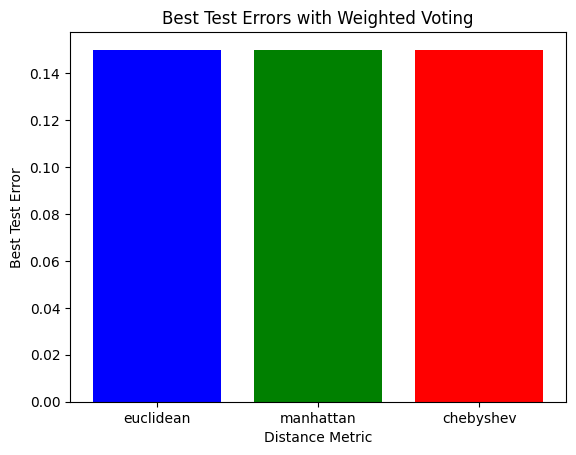

In [52]:
k_values = list(range(1, 197, 5))

distance_metrics = ["euclidean", "manhattan", "chebyshev"]

bestTest_errors = {}

for metric in distance_metrics:

    #initializes the minimum test error as infinity
    minTest_error = float('inf')
    best_k = None

    for k in k_values:

        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn.fit(xtrain_scaled, ytrain)

        y_pred = knn.predict(xtest_scaled)
        test_error = 1 - accuracy_score(ytest, y_pred)

        print(f"Test Error for k={k}: {test_error:.4f}")

        if test_error < minTest_error:
            minTest_error = test_error
            best_k = k
            print(f"New best k found: {best_k} (Test Error: {minTest_error:.4f})")

    #stores the best k value and lowest test error for the current distance metric
    bestTest_errors[metric] = {"Best k": best_k, "Test Error": minTest_error}
    #print summary for current distance metric
    print(f"\nk for {metric} distance: {best_k}, Lowest Test Error: {minTest_error:.4f}\n")

#prints final results table
print("\nBest Test Errors with Weighted Voting:")
print(bestTest_errors_df)

#plots bar chart comparing the best test errors for each distance metric
plt.bar(bestTest_errors.keys(), [bestTest_errors[m]["Test Error"] for m in bestTest_errors], color=['blue', 'green', 'red'])
plt.xlabel("Distance Metric")
plt.ylabel("Best Test Error")
plt.title("Best Test Errors with Weighted Voting")
plt.show()


In [53]:
bestTrain_error = float("inf")
best_k = None

#loops over different k values to find the lowest training error
for k in k_values:
    #uniform weighting - no distnace-based adjustments
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean", weights="uniform")
    knn.fit(xtrain_scaled, ytrain)

    ytrain_pred = knn.predict(xtrain_scaled)

    train_error = 1 - accuracy_score(ytrain, ytrain_pred)
    print(f"Training Error for k={k}: {train_error:.4f}")  # Show error for each k

    if train_error < bestTrain_error:
        bestTrain_error = train_error
        best_k = k
print(f"\nLowest training error of {bestTrain_error:.4f}")


Training Error for k=1: 0.0000
Training Error for k=6: 0.1810
Training Error for k=11: 0.1667
Training Error for k=16: 0.1810
Training Error for k=21: 0.2095
Training Error for k=26: 0.1905
Training Error for k=31: 0.1857
Training Error for k=36: 0.1857
Training Error for k=41: 0.1952
Training Error for k=46: 0.1905
Training Error for k=51: 0.1762
Training Error for k=56: 0.1857
Training Error for k=61: 0.1952
Training Error for k=66: 0.1762
Training Error for k=71: 0.1762
Training Error for k=76: 0.1810
Training Error for k=81: 0.1952
Training Error for k=86: 0.1905
Training Error for k=91: 0.1952
Training Error for k=96: 0.2095
Training Error for k=101: 0.2048
Training Error for k=106: 0.2143
Training Error for k=111: 0.2286
Training Error for k=116: 0.2238
Training Error for k=121: 0.2333
Training Error for k=126: 0.2571
Training Error for k=131: 0.3333
Training Error for k=136: 0.3333
Training Error for k=141: 0.3333
Training Error for k=146: 0.3333
Training Error for k=151: 0.3333